In [11]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']


In [12]:
train_data=pd.read_csv("Rent.csv",index_col=False)
train_data

,Unnamed: 0,住址,行政區,物件說明,面積,房,衛,廳,物件類型,物件位於幾樓,物件共幾樓,管理費用,租金
0,0,台中市西屯區大業路,西屯區,質感系統裝潢❤管理員❤陽台獨洗❤天然瓦斯,12.00,1.0,1.0,0.0,獨立套房,8,10,"1,000元/月",11700.0
1,1,台中市西屯區市政北二路,西屯區,｜市政✅大衣櫥✅流理台✅子母車✅陽台獨洗,12.00,1.0,1.0,0.0,獨立套房,2,6,"1,500元/月",12500.0
2,2,台中市西屯區何厝東二街,西屯區,永豐棧~陽台獨洗~大坪數~全新出租,13.00,1.0,1.0,0.0,獨立套房,4,7,"1,000元/月",10999.0
3,3,台中市西屯區西屯路二段256巷6號,西屯區,新都心辦公室出租(建築師.律師.總部),64.92,0.0,0.0,0.0,辦公,13,22,2500元/月,32000.0
4,4,台中市西屯區寶慶街50巷,西屯區,秒殺三房✅傢俱電全✅含平車位✅台電大間,33.00,3.0,2.0,2.0,整層住家,2,14,"2,000元/月",25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3655,3655,台中市西屯區市政路535號,西屯區,七期市政河南💖精裝雙主臥美豪宅💖,60.00,3.0,3.0,2.0,整層住家,4,29,"9,000元/月",81000.0
3656,3656,台中市西屯區華美西街二段,西屯區,🧡電梯美屋🧡陽台獨洗🧡地下機車🧡,15.60,1.0,1.0,0.0,獨立套房,2,5,"1,000元/月",7999.0
3657,3657,台中市西屯區市政路539號,西屯區,外商家庭首選室內60坪舒適精裝雙主臥豪宅,60.00,3.0,3.0,2.0,整層住家,4,29,NaN,90000.0
3658,3658,台中市西屯區國安二路,西屯區,★獨洗陽台★流理台★可報稅補助★可戶籍,25.00,1.0,1.0,1.0,整層住家,7,12,701元/月,19999.0


In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3660 non-null   int64  
 1   住址          3660 non-null   object 
 2   行政區         3660 non-null   object 
 3   物件說明        3660 non-null   object 
 4   面積          3660 non-null   float64
 5   房           3660 non-null   float64
 6   衛           3660 non-null   float64
 7   廳           3660 non-null   float64
 8   物件類型        3660 non-null   object 
 9   物件位於幾樓      3660 non-null   int64  
 10  物件共幾樓       3660 non-null   int64  
 11  管理費用        2928 non-null   object 
 12  租金          3660 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 371.8+ KB


In [14]:
data=train_data.drop(["Unnamed: 0","行政區","物件說明"],axis=1)
data

,住址,面積,房,衛,廳,物件類型,物件位於幾樓,物件共幾樓,管理費用,租金
0,台中市西屯區大業路,12.00,1.0,1.0,0.0,獨立套房,8,10,"1,000元/月",11700.0
1,台中市西屯區市政北二路,12.00,1.0,1.0,0.0,獨立套房,2,6,"1,500元/月",12500.0
2,台中市西屯區何厝東二街,13.00,1.0,1.0,0.0,獨立套房,4,7,"1,000元/月",10999.0
3,台中市西屯區西屯路二段256巷6號,64.92,0.0,0.0,0.0,辦公,13,22,2500元/月,32000.0
4,台中市西屯區寶慶街50巷,33.00,3.0,2.0,2.0,整層住家,2,14,"2,000元/月",25000.0
...,...,...,...,...,...,...,...,...,...,...
3655,台中市西屯區市政路535號,60.00,3.0,3.0,2.0,整層住家,4,29,"9,000元/月",81000.0
3656,台中市西屯區華美西街二段,15.60,1.0,1.0,0.0,獨立套房,2,5,"1,000元/月",7999.0
3657,台中市西屯區市政路539號,60.00,3.0,3.0,2.0,整層住家,4,29,NaN,90000.0
3658,台中市西屯區國安二路,25.00,1.0,1.0,1.0,整層住家,7,12,701元/月,19999.0


In [15]:
data.loc[3659].info()

<class 'pandas.core.series.Series'>
Index: 10 entries, 住址 to 租金
Series name: 3659
Non-Null Count  Dtype 
--------------  ----- 
10 non-null     object
dtypes: object(1)
memory usage: 460.0+ bytes


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   住址      3660 non-null   object 
 1   面積      3660 non-null   float64
 2   房       3660 non-null   float64
 3   衛       3660 non-null   float64
 4   廳       3660 non-null   float64
 5   物件類型    3660 non-null   object 
 6   物件位於幾樓  3660 non-null   int64  
 7   物件共幾樓   3660 non-null   int64  
 8   管理費用    2928 non-null   object 
 9   租金      3660 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 286.1+ KB


In [17]:
data.fillna(value = '0元/月', inplace = True)

In [18]:
data['管理費用'] =  data['管理費用'].apply(lambda x : x.split('元')[0])

In [19]:
data['管理費用'] 

0       1,000
1       1,500
2       1,000
3        2500
4       2,000
        ...  
3655    9,000
3656    1,000
3657        0
3658      701
3659    2,200
Name: 管理費用, Length: 3660, dtype: object

Text(0.5, 1.0, '確診日期人數')

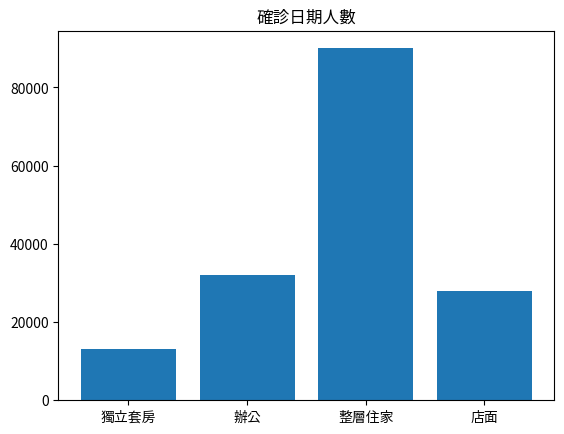

In [20]:
plt.bar(data.物件類型,data.租金)
plt.title('確診日期人數')